<a href="https://colab.research.google.com/github/MuhammadAdhikaIsaNugraha/Machine_Learning_2023/blob/main/Pembelajaran_Mesin_Week_4(12_Muhammad_Adhika_Isa_Nugraha_2141720267).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **12/Muhammad Adhika Isa Nugraha/2141720267**

---



# **Lab Assignment Week 4**

---



Task

1. Create a classification model using SVM for the voice.csv data.
2. Create a Multinomial Naive Bayes classification model with the following conditions:

  >a. Use the spam.csv data.

  >b. Utilize CountVectorizer with stop words enabled.

  >c. Evaluate the results.

3. Create another Multinomial Naive Bayes classification model with the following conditions:

  >a. Use the spam.csv data.

  >b. Employ TF-IDF features with stop words enabled.

  >c. Evaluate the results and compare them with the results from Task #2.

  >d. Provide a conclusion on which feature extraction method is best for the spam.csv dataset.


---



>1. Create a classification model using SVM for the voice.csv data.

Step 0 - Import Library

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

import pandas as pd

# Load data with specific encoding due data doesn't use utf-8 encoding
df = pd.read_csv('voice.csv', encoding='latin-1')

# Check
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Step 1 - Create Dummy Data

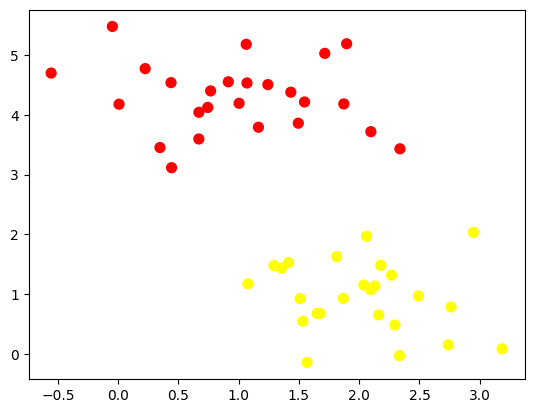

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

2. **Create a Multinomial Naive Bayes classification model with the following conditions:**

>b. Utilize CountVectorizer with stop words enabled.

In [2]:
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = pd.read_csv('/content/voice.csv')

X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Label


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_text = X.applymap(str).apply(' '.join, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

>**c. Evaluate the results**

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

from sklearn.metrics import accuracy_score

# Initialize and train the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train_vectorized, y_train)

# Make a prediction using training data
y_pred_train = mnb.predict(X_train_vectorized)

# Evaluate training data
acc_train = accuracy_score(y_train, y_pred_train)

# Make a prediction using testing data
y_pred_test = mnb.predict(X_test_vectorized)

# Evaluate testing data
acc_test = accuracy_score(y_test, y_pred_test)

# Print model evaluation
print(f'Training Accuracy: {acc_train}')
print(f'Testing Accuracy: {acc_test}')

Training Accuracy: 1.0
Testing Accuracy: 0.6545741324921136


3. **Create another Multinomial Naive Bayes classification model with the following conditions:**

>Employ TF-IDF features with stop words enabled.

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

data = pd.read_csv('/content/voice.csv')

X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Label


from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_text = X.applymap(str).apply(' '.join, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)


In [8]:
# Initialize TF-IDF Vectorizer with stop words
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = vectorizer.transform(X_test)

In [9]:
# Initialize and train the Multinomial Naive Bayes model
naive_bayes_model_tfidf = MultinomialNB()
naive_bayes_model_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

**Result**

In [10]:
# Make a prediction using training data
y_pred_train = mnb.predict(X_train_tfidf)

# Evaluate training data
acc_train = accuracy_score(y_train, y_pred_train)

# Make a prediction using testing data
y_pred_test = mnb.predict(X_test_tfidf)

# Evaluate testing data
acc_test = accuracy_score(y_test, y_pred_test)

# Print model evaluation
print(f'Training Accuracy: {acc_train}')
print(f'Testing Accuracy: {acc_test}')

Training Accuracy: 1.0
Testing Accuracy: 0.6230283911671924
